<a href="https://colab.research.google.com/github/john-s-butler-dit/CaseStudy_PredatorPrey/blob/master/09_Zombie_SIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zombie SIR Differential Equations


In this notebook we will model the spread of disease using the Kermack-McKendrick Model which is a compartment model. This is inspired by the movies of George A Romero such as "Night of the Living Dead."

In [2]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt

The model is a system of three non-linear first order differential equations:
\begin{equation}
\begin{array}{cl}
\frac{dS}{dt}=-\frac{\beta BS}{N},\\
\frac{dB}{dt}=\frac{\beta BS}{N}-\gamma B,\\
\frac{dZ}{dt}=\gamma B
\end{array}
\end{equation}
where 
S is the people who are susceptible (not zombie) in the population, 
B is the number of people bitten by zombies, 
Z is the number of Zombies, and 
N is the sum of these three $$ N=S(t_0)+B(t_0)+Z(t_0).$$
$\beta$ is the infection rate, and $\gamma$ is the time to convert to zombie.
$$ R_{0}={\frac{\beta }{\gamma }},$$

the so-called basic reproduction number (also called basic reproduction ratio).

## Zombie Reproduction Number

Here are **imagined Reproduction $R_0$ values** for zombies in popular movies and TV shows.  
They are estimates based on how fast the infection spreads in the story.

| Zombie Film / Show | Type of Zombie | Approximate $R_0$ | What it’s like |
|-------------------|---------------|---------------------|----------------|
| **The Walking Dead** | Slow, biting zombies | ~2–3 | Spreads slowly, similar to a bad flu |
| **Shaun of the Dead** | Slow, classic zombies | ~1.5–2 | Infection spreads, but quite slowly |
| **World War Z** | Fast, aggressive zombies | ~10–20 | Extremely fast spread |
| **28 Days Later** | Rage virus (very fast) | ~15–25 | Almost instant infection |
| **Train to Busan** | Fast, overwhelming spread | ~12–18 | Similar to measles-level spread |
| **Resident Evil** |n | ~5–10 | Rapid spread with mutations |




In [45]:
beta=4
gamma=2

## Discrete Domain 
To numerically approximate the solution we discretise the continuous domain using a step size, $dt=0.001$, 
which gives
\begin{equation}
t_i=0+i dt,
\end{equation}
for $i=0,...n$.
The figure below illustrate the discrete domain.

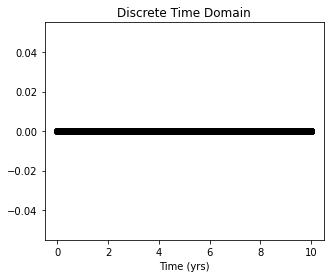

In [ ]:
dt=0.001
t=np.arange(0,10+dt/2,dt)
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t,0*t,'o:',color='k')
ax.set_xlabel('Time (yrs)')
plt.title('Discrete Time Domain')
plt.show()

In [47]:
n=len(t) # Number of Steps
S=np.zeros(n) # Numerical Solution Sus.
S[0]=99 # Intial Hare population
B=np.zeros(n) # Numerical Solution for Bitten
B[0]=1# Initial Bitten population
Z=np.zeros(n) # Numerical Solution Zombie
Z[0]=0# Initial Zombie population

N=S[0]+B[0]+Z[0]


We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
S[i+1] = S[i]+ dt*\big(-beta*S[i]*B[i]/N \big)
\end{equation}

\begin{equation}
B[i+1] = B[i]+ dt*\big(\beta*S[i]*B[i] /N- gamma B[i] \big)
\end{equation}

\begin{equation}
Z[i+1] = Z[i]+ dt*\big(gamma B[i] \big)
\end{equation}


where $dt$ is the stepsize and  $S[i]$, $B[i]$ and $Z[i]$ are the numerical approximation of the susceptible $S(t_i)$, bitten $I(t_i)$ and zombies $Z(t_i)$ at time $t_i$, for $i=0,...,n$


In [ ]:
for i in range (0,n-1):
    S[i+1]=S[i]+dt*(-beta*S[i]*B[i]/N) 
    B[i+1]=B[i]+dt*(beta*S[i]*B[i]/N-gamma*B[i])
    Z[i+1]=Z[i]+dt*gamma*B[i]


## Results


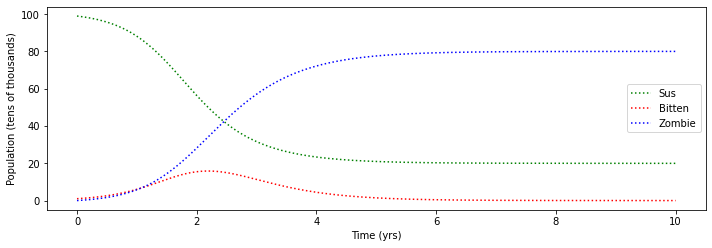

In [49]:
## Plotting Figure
fig = plt.figure(1,figsize=(10,4))

ax = fig.add_subplot(1,1,1)

ax.plot(t,S,':',color='green',label='Sus')
ax.plot(t,B,':',color='red',label='Bitten')
ax.plot(t,Z,':',color='blue',label='Zombie')


ax.legend()
ax.set_xlabel('Time (yrs)')
ax.set_ylabel('Population (tens of thousands)')
#ax.legend(loc='best')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


## Phase Plane Plot


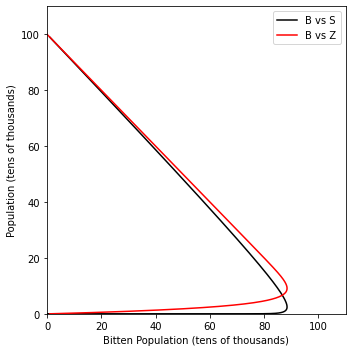

In [39]:
## Plotting Figure
fig = plt.figure(1,figsize=(5,5))

ax = fig.add_subplot(1,1,1)

ax.plot(B,S,'-',color='black',label='B vs S')
ax.plot(B,Z,'-',color='red',label='B vs Z')


ax.set_xlabel('Bitten Population (tens of thousands)')
ax.set_ylabel('Population (tens of thousands)')
ax.legend(loc='best')
plt.tight_layout()
plt.ylim(0,110)
plt.xlim(0,110)

plt.show()

# References

[1] Weisstein, Eric W. "Kermack-McKendrick Model." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/Kermack-McKendrickModel.html

[2]  Wikipedia contributors. (2021, February 28). Compartmental models in epidemiology. In Wikipedia, The Free Encyclopedia. Retrieved 18:12, March 15, 2021, from https://en.wikipedia.org/w/index.php?title=Compartmental_models_in_epidemiology&oldid=1009414539

[3] Wikipedia contributors. (2021, March 3). George A. Romero. In Wikipedia, The Free Encyclopedia. Retrieved 11:20, March 16, 2021, from https://en.wikipedia.org/w/index.php?title=George_A._Romero&oldid=1010119184